**ETL PIPELINE FRO SPOTIFY API DATA AND LOADED INTO SQlite DATABASE**



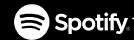

Importing required packages

In [32]:
import json
import requests
import datetime
import sqlite3
import sqlalchemy
import pandas as pd
import datetime
from sqlalchemy.orm import sessionmaker

ETL PIPELINE

In [37]:

DATABASE_LOCATION = "sqlite:///my_played_tracks.sqlite"
USER_ID = "gwndt5olal7qvij6g5gl33578"
TOKEN = "BQAA5HQQYAOhvE8ayWFYmyGVJL6zUsfViFxk5iXngeFQWkAbYOGpUxJOKsif4Y4wbp5J2fg_WLaV3qxkxG6Po5EwkB71YxrGiBYxXjkd_ET24tAAWXxNEqYbmciCHXJIf-7sm9I6DHDHFCLNf1Xul95_Wg4wi1Gck3OXGFq1gnOPZSI9KGjOSImh1lD2Cs-RK5ME3M1N"

def check_if_valid_data(df: pd.DataFrame) -> bool:

    if df.empty:
        print("No songs.")
        return False

    # If we got duplicate, the data pipeline should get failed

    if pd.Series(df['played_at']).is_unique:
        pass
    else:
        raise Exception("Primary Key Check is violated.")

    # any null in rows & columns

    if df.isnull().values.any():
        raise Exception("Null Values detected.")


if __name__ == "__main__":

    # Extract part of the ETL process

    headers = {
        "Accept": "application/json",
        "Content-Type": "application/json",
        "Authorization": "Bearer {token}".format(token=TOKEN)
    }

    # Convert time to Unix timestamp in miliseconds
    today = datetime.datetime.now()
    yesterday = today - datetime.timedelta(days=90)
    yesterday_unix_timestamp = int(yesterday.timestamp()) * 1000

    req = requests.get("https://api.spotify.com/v1/me/player/recently-played?after={time}".format(time=yesterday_unix_timestamp), headers = headers)

    data = req.json()

    song_names = []
    artist_names = []
    played_at_list = []
    timestamps = []

    # Extracting only the relevant bits of data from json
    for song in data["items"]:
        song_names.append(song["track"]["name"])
        artist_names.append(song["track"]["album"]["artists"][0]["name"])
        played_at_list.append(song["played_at"])
        timestamps.append(song["played_at"][0:10])

    song_dict = {
        "song_name": song_names,
        "artist_name": artist_names,
        "played_at": played_at_list,
        "timestamp": timestamps
    }

    song_df = pd.DataFrame(song_dict, columns=["song_name", "artist_name", "played_at", "timestamp"])

    if check_if_valid_data(song_df):
        print("Valid Data, proceed to Load Stage.")

    #  load

    engine = sqlalchemy.create_engine(DATABASE_LOCATION)
    conn = sqlite3.connect("my_played_tracks.sqlite")
    cursor = conn.cursor()

    sql_query = """
        CREATE TABLE IF NOT EXISTS my_played_tracks(
            song_name VARCHAR(200),
            artist_name VARCHAR(200),
            played_at VARCHAR(200),
            timestamp VARCHAR(200),
            CONSTRAINT primary_key_constraint PRIMARY KEY (played_at)
        )
    """

    cursor.execute(sql_query)
    print("Opened Database succesfully.")

    try:
        song_df.to_sql("my_played_tracks", engine, index=False, if_exists='append')

    except:
        print("Database already exists.")

    cursor.close()
    print("Closed Database.")

Opened Database succesfully.
Database already exists.
Closed Database.


In [38]:
data

{'items': [{'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3ozYqVCLohfpXIhalkhM8D'},
       'href': 'https://api.spotify.com/v1/artists/3ozYqVCLohfpXIhalkhM8D',
       'id': '3ozYqVCLohfpXIhalkhM8D',
       'name': 'Aditya Rikhari',
       'type': 'artist',
       'uri': 'spotify:artist:3ozYqVCLohfpXIhalkhM8D'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',